![image](https://drive.google.com/u/0/uc?id=15DUc09hFGqR8qcpYiN1OajRNaASmiL6d&export=download)

# **Taller No. 10 - ISIS4825**

## **Perceptron Multicapa y Redes Neuronales Profundas**
1. [**Objetivos**](#id1)
2. [**Problema**](#id2)
3. [**Importando las librerías necesarias para el laboratorio**](#id3)
4. [**Visualización y Análisis Exploratorio**](#id4)
5. [**Preparación de los Datos**](#id5)
6. [**Modelamiento**](#id6)
7. [**Predicción**](#id7)
8. [**Validación**](#id8)
9. [**Trabajo Asíncrono**](#id9)

## **Objetivos**<a name="id1"></a>
- Introducirnos a las redes neuronales a través del perceptron multicapa.
- Ver algunas funciones básicas de `Keras` y de `TensorFlow`.

## **Problema**<a name="id2"></a>

## **Notebook Configuration**

In [14]:
!shred -u setup_colab_general.py
!wget -q "https://github.com/jpcano1/python_utils/raw/main/setup_colab_general.py" -O setup_colab_general.py
import setup_colab_general as setup_general
setup_general.setup_general()

shred: setup_colab_general.py: failed to open for writing: No such file or directory



General Functions Enabled Successfully


## **Importando las librerías necesarias para el laboratorio**<a name="id3"></a>

In [55]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")
import seaborn as sns

from utils import general as gen

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, confusion_matrix

### **Carga de Datos**

In [2]:
(full_X_train, full_y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
full_X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## **Visualización y Análisis Exploratorio**<a name="id4"></a>

In [4]:
np.random.seed(0)
random_sample = np.random.choice(len(full_X_train), size=9)

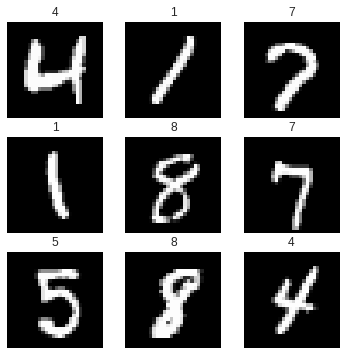

In [5]:
gen.visualize_subplot(full_X_train[random_sample], 
                      full_y_train[random_sample], 
                      (3, 3), (6, 6))

In [6]:
dist = np.unique(full_y_train, return_counts=True)

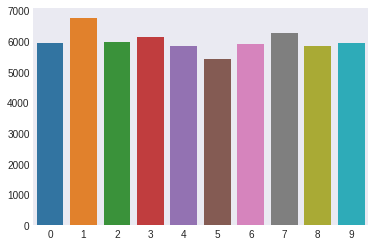

In [7]:
sns.barplot(x=dist[0], y=dist[1])
plt.show()

In [8]:
dist[1].mean()

6000.0

## **Preparación de los Datos**<a name="id5"></a>

### **Normalización**

In [9]:
full_X_train, X_test = full_X_train / 255., X_test / 255.

In [10]:
full_X_train.max()

1.0

In [11]:
X_test.max()

1.0

In [12]:
full_X_train.mean()

0.1306604762738429

### **Train Set, Validation Set, Test Set**

In [13]:
sss = StratifiedShuffleSplit(test_size=0.2, random_state=1234)

In [14]:
for train_index, val_index in sss.split(full_X_train, full_y_train):
    X_train, y_train = full_X_train[train_index], full_y_train[train_index]
    X_val, y_val = full_X_train[val_index], full_y_train[val_index]

## **Modelamiento**<a name="id6"></a>

In [105]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation="softmax", kernel_initializer="he_normal")
])

In [106]:
optimizer = keras.optimizers.Adam(lr=5e-4)
metrics = [keras.metrics.SparseCategoricalAccuracy(name="acc")]
loss = keras.losses.SparseCategoricalCrossentropy(name="loss")

In [107]:
model.compile(optimizer=optimizer, metrics=metrics, loss=loss)

In [108]:
history = model.fit(X_train, y_train, batch_size=64, 
                    validation_data=(X_val, y_val), 
                    epochs=10)

Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3018 - acc: 0.9129 - val_loss: 0.1641 - val_acc: 0.9497
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1201 - acc: 0.9647 - val_loss: 0.1046 - val_acc: 0.9684
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0781 - acc: 0.9758 - val_loss: 0.0998 - val_acc: 0.9680
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0559 - acc: 0.9834 - val_loss: 0.0804 - val_acc: 0.9753
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0414 - acc: 0.9873 - val_loss: 0.1020 - val_acc: 0.9689
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0339 - acc: 0.9897 - val_loss: 0.0834 - val_acc: 0.9751
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0252 - acc: 0.9924 - val_loss: 0.0781 - val_acc: 0.9758
Epoch 8/10
750/750 [==============================] - 3s 4ms/step - loss: 0.

## **Predicción**<a name="id7"></a>

In [109]:
np.random.seed(1234)
random_sample = np.random.choice(len(X_test), 9)

In [110]:
y_pred = model.predict(X_test[random_sample])

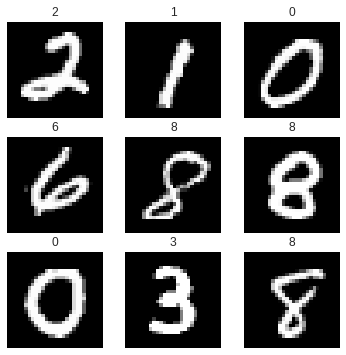

In [111]:
gen.visualize_subplot(X_test[random_sample], 
                      y_pred.argmax(axis=1), 
                      (3, 3), (6, 6))

## **Validación**<a name="id8"></a>

In [112]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0951 - acc: 0.9753


In [113]:
loss

0.0950610563158989

In [114]:
acc

0.9753000140190125

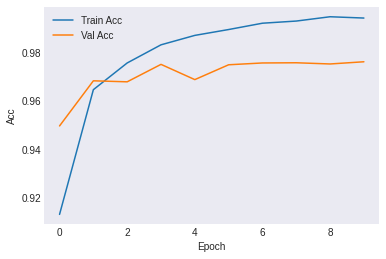

In [115]:
plt.plot(history.history["acc"], label="Train Acc")
plt.plot(history.history["val_acc"], Label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(loc="best")
plt.show()

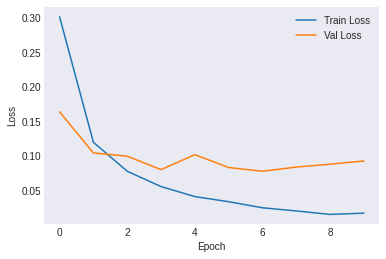

In [116]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

In [117]:
y_pred = model.predict(X_test)

In [118]:
conf_matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))

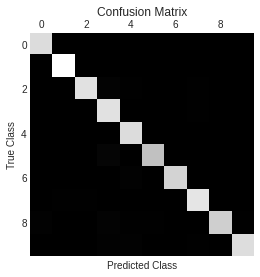

In [119]:
plt.matshow(conf_matrix, cmap="gray")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [120]:
norm_conf_mat = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
np.fill_diagonal(norm_conf_mat, 0)

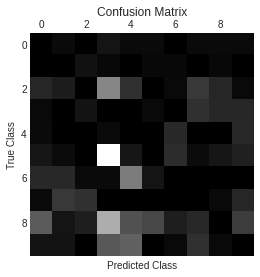

In [121]:
plt.matshow(norm_conf_mat, cmap="gray")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [122]:
precision_score(y_test, y_pred.argmax(axis=1), average="weighted")

0.9756359740322463

In [123]:
recall_score(y_test, y_pred.argmax(axis=1), average="weighted")

0.9753

## **Trabajo Asíncrono**<a name="id9"></a>